In [1]:
import pandas as pd

In [2]:
import numpy as np

In [63]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df1 = pd.read_csv("./datasets/steam_charts.csv", usecols=["Month", "Avg. Players", "Peak Players", "App ID", "Game"])

In [5]:
df1 = df1.rename(columns = {"Game":"name", "App ID":"appid"}) #df1 stores player count data

In [6]:
df2 = pd.read_csv("./datasets/steam_info.csv", usecols=["steam_appid", "price"]) 

In [7]:
df2 = df2.rename(columns = {"steam_appid":"appid"}) #df2 stores price data

In [8]:
df3 = pd.read_csv("./datasets/steamspy_data.csv", usecols=["appid", "owners", "price", "initialprice", "discount"]) 

In [9]:
df3 = df3.rename(columns = {"price":"oldprice"}) # df3 stores downloads info

In [10]:
df = pd.merge(df1, df2, on = "appid", how = "inner") 


In [11]:
# ["average_forever", "average_2weeks", "median_forever", "median_2weeks"] additional df3 columns I may use

In [12]:
df3 = df3.join(df3["owners"].str.split(pat=" .. ", expand=True))

In [13]:
del df3["owners"]

In [14]:
df3.columns = ['appid', 'oldprice', 'initialprice', 'discount', 'min_owners', 'max_owners']

In [15]:
df3["min_owners"] = df3["min_owners"].replace(',', '', regex=True).astype(int) # removes commas from min/max_owners

In [16]:
df3["max_owners"] = df3["max_owners"].replace(',', '', regex=True).astype(int) # i.e. 1,000,000 becomes 1000000

In [17]:
df = pd.merge(df, df3, on = "appid", how = "inner")

In [25]:
df["avg_owners"] = (df["max_owners"] + df["min_owners"])/2

In [51]:
df["avg_player_proportion"] = (df["Avg. Players"] / df["avg_owners"])*100

In [52]:
df #Cleaned up dataset

,Month,Avg. Players,Peak Players,appid,name,price,oldprice,initialprice,discount,min_owners,max_owners,avg_owners,avg_player_proportion
0,Last 30 Days,575701.03,906670,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.767601
1,June 2022,572222.47,906670,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.762963
2,May 2022,564961.70,923996,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.753282
3,April 2022,568983.16,1013237,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.758644
4,March 2022,581489.69,987993,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.775320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49470,May 2019,56.86,105,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.075813
49471,April 2019,49.63,90,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.066173
49472,March 2019,51.58,94,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.068773
49473,February 2019,53.12,93,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.070827


In [130]:
count = 0
for x in df["avg_player_proportion"]:
    if (x > 100):
        count = count + 1
        print(x)
count
#apparently, one game has 5000% more people playing it than who actually own it
#the steamcharts data comes directly from steam, the steamspy data doesn't and is only 98% accurate


491.84220000000005
501.5034
900.4714
2114.6889
5220.6637
239.4535
237.04160000000002
256.39979999999997
170.3959
175.9196
183.8207
157.1612
113.39280000000001
115.141
392.44849999999997
417.1787
924.4844
264.9997
270.6714
183.55419999999998
775.2768
161.8371
250.21970000000002
128.7074
117.1465


25

<AxesSubplot:xlabel='price', ylabel='avg_player_proportion'>

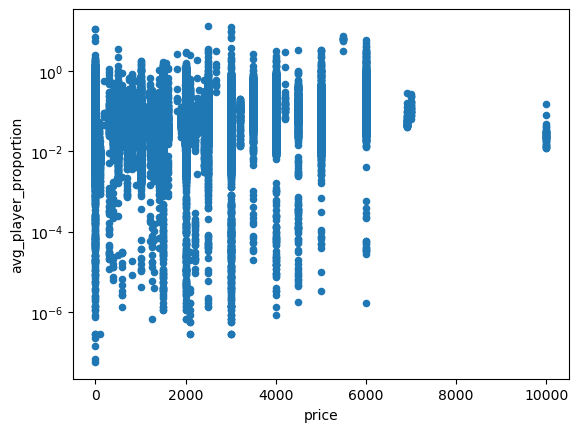

In [53]:
df[df["min_owners"] > 30000].plot.scatter(x = "price", y = "avg_player_proportion", logy=True)

<AxesSubplot:ylabel='Density'>

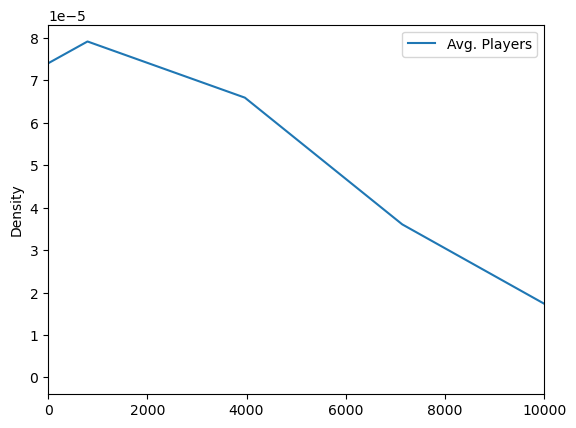

In [54]:
df[df["min_owners"] > 30000].plot.kde(x = "price", y = "Avg. Players", xlim=[0, 10000])

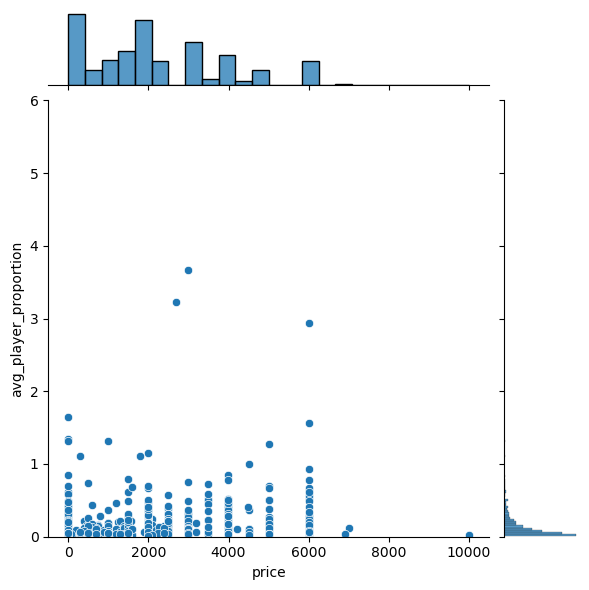

In [117]:
sns.jointplot(x = "price", y = "avg_player_proportion", data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")], ylim=[0, 6])

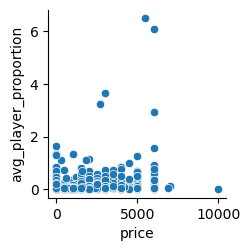

In [115]:
sns.pairplot(x_vars = "price", y_vars = "avg_player_proportion", data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")])

In [126]:
df.corr()

,Avg. Players,Peak Players,appid,price,oldprice,initialprice,discount,min_owners,max_owners,avg_owners,avg_player_proportion
Avg. Players,1.000000,0.988043,-0.055309,-0.074309,-0.075860,-0.081236,-0.029338,0.733888,0.710953,0.719173,0.071242
Peak Players,0.988043,1.000000,-0.044335,-0.068247,-0.069945,-0.074583,-0.027410,0.705276,0.683874,0.691567,0.071731
appid,-0.055309,-0.044335,1.000000,0.184282,0.165505,0.194295,0.008895,-0.176156,-0.180876,-0.179551,0.036778
price,-0.074309,-0.068247,0.184282,1.000000,0.885046,0.922562,0.060919,-0.170419,-0.172425,-0.171969,0.026509
oldprice,-0.075860,-0.069945,0.165505,0.885046,1.000000,0.947091,-0.188551,-0.167790,-0.171205,-0.170291,0.021510
initialprice,-0.081236,-0.074583,0.194295,0.922562,0.947091,1.000000,0.079302,-0.180264,-0.183999,-0.182996,0.020602
discount,-0.029338,-0.027410,0.008895,0.060919,-0.188551,0.079302,1.000000,-0.059879,-0.061758,-0.061219,-0.002534
min_owners,0.733888,0.705276,-0.176156,-0.170419,-0.167790,-0.180264,-0.059879,1.000000,0.994894,0.997660,-0.005197
max_owners,0.710953,0.683874,-0.180876,-0.172425,-0.171205,-0.183999,-0.061758,0.994894,1.000000,0.999466,-0.005484
avg_owners,0.719173,0.691567,-0.179551,-0.171969,-0.170291,-0.182996,-0.061219,0.997660,0.999466,1.000000,-0.005397


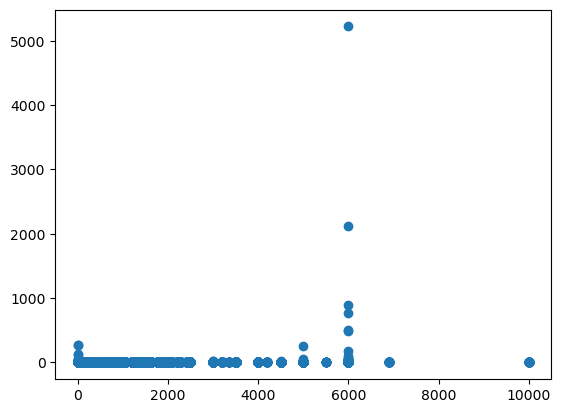

In [132]:
plt.scatter(x=df["oldprice"], y=df["avg_player_proportion"])